Delta x = 0.01 Delta t =  5e-05 C = 0.5


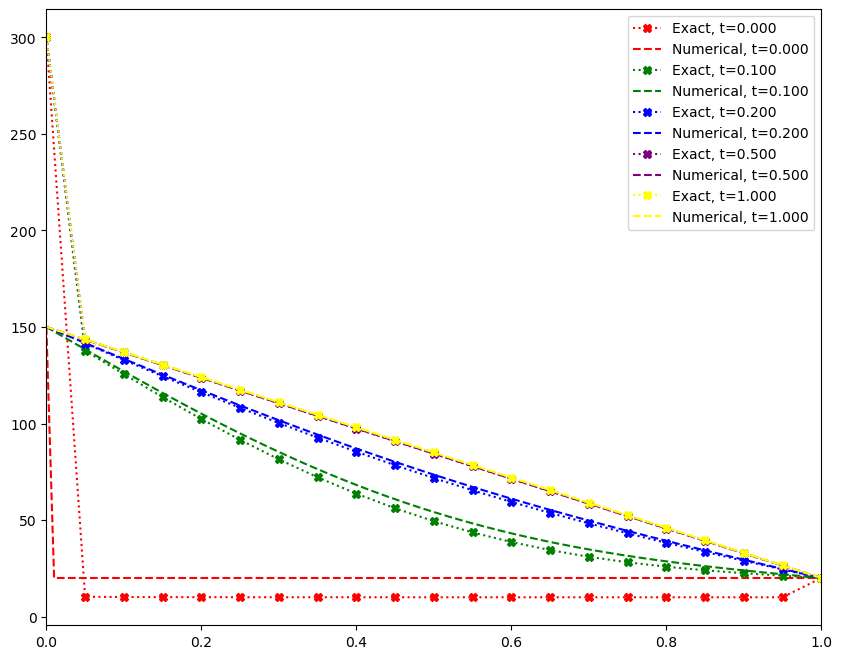

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
%matplotlib inline

# Boundary conditions
b0 = 150  # u(0,t)= b0
bL = 20   # u(L,t)= bL

# Initial condition u(x,0)
def I(x): 
    len_x = np.size(x)
    i_x = 20 *np.ones(len_x) # For constant initial temperature of the liquid
    return i_x

# Input analytical solution found by hand
def U_exact(x,t):
    M = np.size(x)
    u_ex = np.zeros(M)  
    u_ex[0] = b0   # b0 is dirichlet boundary condition at u(0,t)
    for n in range(1,2000):  # use 2000 terms in the summation of the exact solution
        npi= n*np.pi
        if (n%2 == 0):
            c_n = (260)*((-1)**(n+1))/(npi)             
        else:
            c_n = (260)*((-1)**(n+1))/(npi)  - 560/npi                  
        u_ex = u_ex + c_n*np.sin(npi*x)*np.exp(-1*(npi)**2*t)
        
    u_ex = u_ex + 150 - 130*x  # include 150 - 130x term in exact solution
    u_ex[-1] = bL # bL is dirichlet boundary condition at u(L,t)
    return u_ex

def plotting(U,L):
    size_t = np.size(U,1)-1 # number of time steps
   
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    markers =['X','.','+','o']

    colours = ['r','g','b','purple','yellow'] # make comparison easy
    colour_pos = 0;

    N_dots = 20
    x_dots = np.linspace(0, L, N_dots+1) # spatial points to plot exact solution at

    # some arbitarily chosen time points to compare at
    for plot_pos in [0, int(size_t/10),int(size_t/5), int(size_t/2), int(size_t)]:
    
    # exact solution
        U_tplot = U_exact(x_dots,t[plot_pos]) 
        label = "Exact, t=" + "%0.3f" % (t[plot_pos],)
        ax.plot(x_dots,U_tplot,linestyle = ':',color = colours[colour_pos],marker = markers[0], label=label)

    # numerical solution
        label = "Numerical, t=" + "%0.3f" % (t[plot_pos],)
        ax.plot(x,U[:,plot_pos],color = colours[colour_pos],ls='--', label=label)
        colour_pos = colour_pos + 1;
    
    plt.xlim(0,L) # zoom in on area of interest
    ax.legend() # turn on legend 
    plt.show()

# Set parameters

Nt_gaps = 20000    # number of timesteps
T = 1              # final time 
Nt_points = Nt_gaps + 1
t = np.linspace(0.,T,Nt_points)  # times at each time step

Nx_spaces = 100;   # number of spaces in x
L = 1; # Length of the can, 1 for now, will need to be changed but this will affect the exact solution as well
Nx_points = Nx_spaces + 1 
x = np.linspace(0, L, Nx_points)    # mesh points in space

dx = x[1] - x[0] 
dt = t[1] - t[0]

C = dt/(dx**2)

print("Delta x =", dx, "Delta t = ", dt, "C =", C)

# Initialize output

# Define the numerical solution 
# the first index is space and the second time
U = np.zeros((Nx_points,Nt_points))

# The initial condition
U[:,0]=I(x)

# enforce the boundary condition
U[0,0]  = b0 
U[-1,0] = bL

'''
 This script finds a numerical approximation for the solution to
 the following 1D heat equation:
   u_t = u_xx  for  x in (0,1),  t in (0,T),
   u(x,t=0) = 20
   u(x=0,t) = 150;  u(x=1,t) = 20,
 using a forward Euler scheme.
''' 
u_old = I(x)        # old/current values
u = np.zeros(Nx_points) # new values

for n in range(1, Nt_points):
    # set Dirichlet boundary points
    u[0]  = b0   
    u[-1] = bL
    
    # apply forward Euler on the internal points
    for i in range(1, Nx_points-1):
        u[i] = u_old[i] + C *(u_old[i-1] - 2*u_old[i] + u_old[i+1])
 
    # update u_old before next step
    u_old[:]= u
    # copy into full storage
    U[:,n] = u;

# plot snapshots of the solution
plotting(U, L)